Minh Le

G01270908

ECE 427 - Spring 2024

# Computer Exercise 1.1
## 1. Getting Started
Load classes that will be used for the exercises:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from IPython.display import display, Markdown # Used to display some varibles values in the report

## 2. Warm-up
A toy data set using the make_classification class from the sklearn.datasets library. Generate a data set of 200 samples:

In [8]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_samples=200,
n_redundant=0, n_informative=2, class_sep=1,random_state=127) # random_state: first 3 digits of Gnumber

# Split the data set into a training set and a test set:
X_train,X_test,y_train,y_test=train_test_split(X, y)

<font size="4">__Question__</font>

**What is the split that is performed, i.e. what percentage of the samples are in the test set? For this size data set, is this reasonable?**

We can check the size of X, X_train, y, and y_train to determine the percentage in questions. 

In [9]:
shape_info1 = f"The shape of X is {X.shape}.  \n"
shape_info2 = f"The shape of y is {y.shape}.  \n"
shape_info3 = f"The shape of X_train is {X_train.shape}.  \n"
shape_info4 = f"The shape of y_train is {y_train.shape}."
# Combine both strings and ensure markdown interprets them as separate lines
combined_info = shape_info1 + shape_info2+ shape_info3+ shape_info4
display(Markdown(combined_info))

The shape of X is (200, 2).  
The shape of y is (200,).  
The shape of X_train is (150, 2).  
The shape of y_train is (150,).

Out of 200 data points, 150 points are put into training and 50 points are in testing.
That is, 25% of the data is in the test set.
This is a small data set, the model will have sufficient data for learning with this split, and a reasonable amount for testing with unseen data.

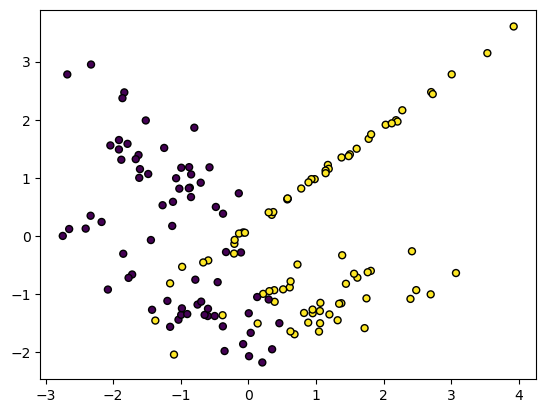

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],marker="o",c=y_train,s=25,edgecolor="k")

In [11]:
clf = SVC(kernel='linear') # Default value of C=1
clf.fit(X_train, y_train)

SVC(kernel='linear')

<font size="4">__Experiment Question (b)__</font>

__What is the accuracy of your classifier on the training set and the test set? Note that the
score method may be used to find the accuracy on a data set (X,y) using the command
clf.score(X,y).__

In [12]:
score1 = f"Training score: {clf.score(X_train,y_train)}.  \n"
score2 = f"Testing score: {clf.score(X_test,y_test)}."
combined_score = score1 + score2
display(Markdown(combined_score))

Training score: 0.88.  
Testing score: 0.78.

<font size="4">__Experiment Question (c)__</font>

__Make a plot of the decision boundary, the margin, and the support vectors__

A plot of decision boundary, the margin, and the support vectors


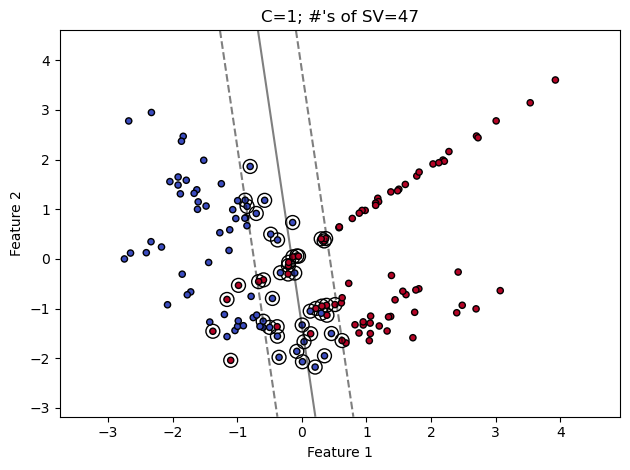

Number of support vectors for each class: [24 23]


In [15]:
print('A plot of decision boundary, the margin, and the support vectors')
Plot_SVM(clf, X_train, y_train,1)

<font size="4">__Question__</font>

__(a) What learning algorithm is used in this scikit-learn method SVC? What other learning
algorithms can be used, and how are they different from this one?__

The SVC method in scikit-learn is Support Vector Classifier using the concept of Support Vector Machine (SVM). SVM is primarily known for classification. SVM finds the best hyperplanes that best separates the classes in the feature space. SVM seeks to maximize that margin between the support vectors. 

Sckikit-learn has other learning algorithm such as Logistic Regression where the model estiamtes probablities using a ligistic function such as sigmoid function.

Another example is Decision Tree model that splits data into branches to form a tree of decisions.

__(b) How many support vectors are there for each class? How does this compare to the number
of support vectors you would expect if the data was linearly separable?__

As printed above, the number of support vectors (SV) of class 1 and 2 are 24 and 23, respectively. The total number of SV is 47, which is also reported on the title of the plot. 

If the data is linearly separatable, the number of SV would be reduced as the margin can be establish with fewer critical points. That is, points that are closest to the margin are sufficient to define the decision boundary (no consideration for violations).


**(c) Does changing the value of C have much effect on the performance of your classifier?**

The strength of regularization is inversely proportional to C. The plots below shows two extreme cases: C=1e-10 for over regulization and C=10e5 for no regulization. For C=1e-10, the model uses most of the data points as SV (142 out of 150 vectors), which results in a low train score. For C=10e5, we can establish of a train score of 88.7% for no regulization. In general, the lower C is (stronger the regulazation), the more SV is needed to define the decision boundary, and the wider the margin is. Out of all the values of C tested here, C=0.01 has the highest test score.

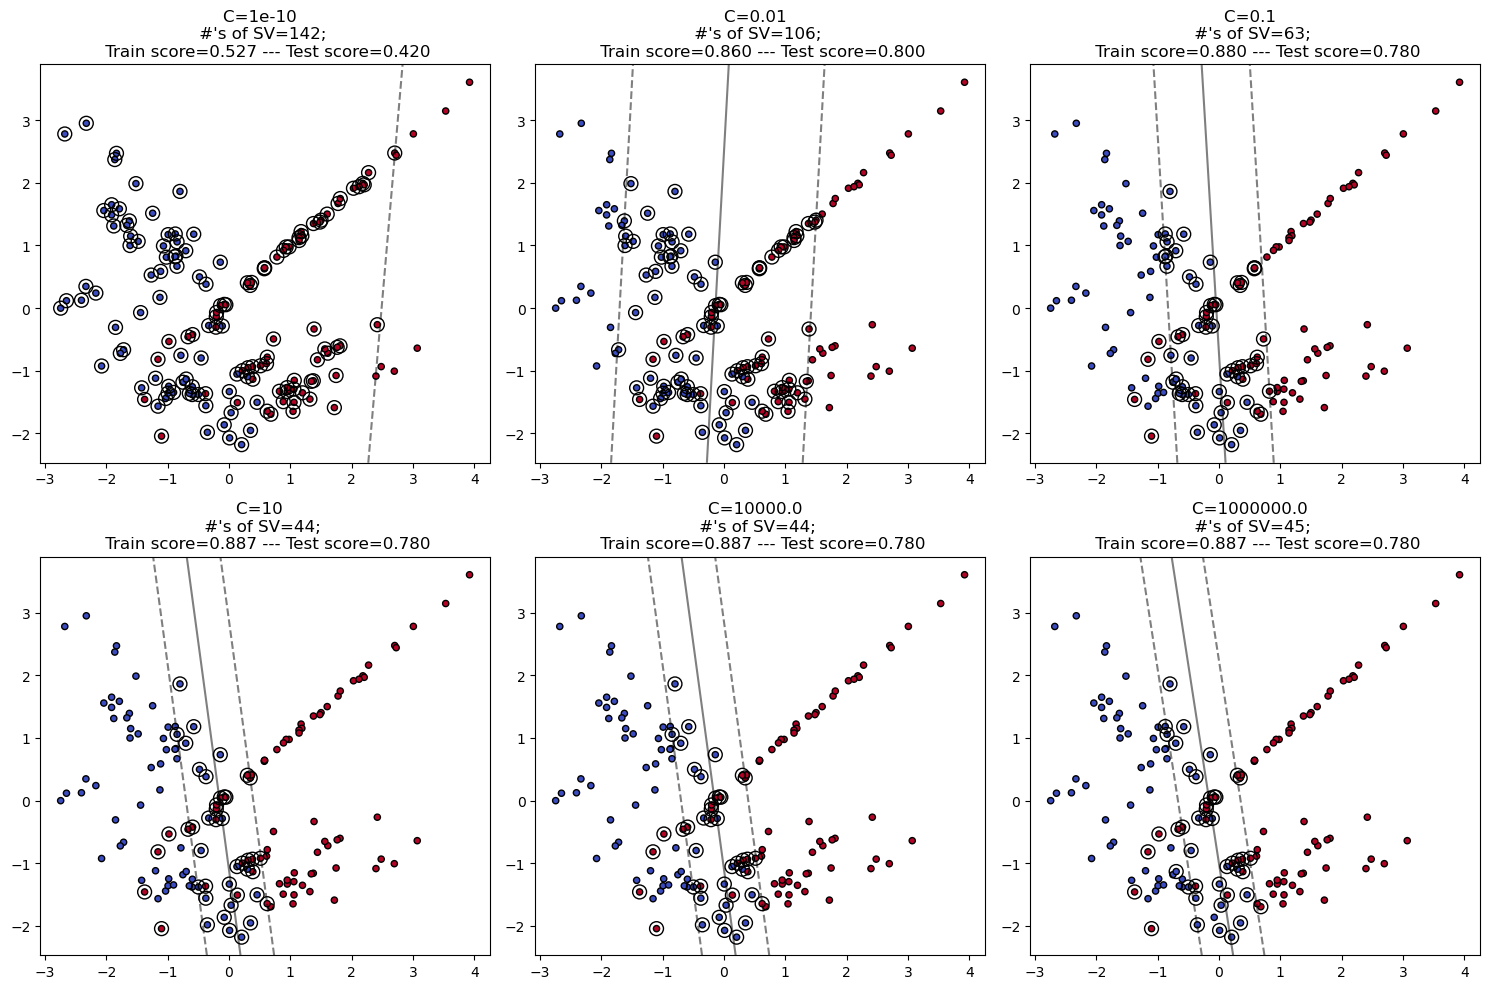

In [17]:
C_values = [1e-10, 0.01, 0.1, 10, 10e3, 10e5]
compare_svm_C_values(X_train, y_train, X_test, y_test, C_values,'linear',1)

__d) Print out the dual coefficients of your classifier using clf.dual\_coef\_. You will get
something that looks like the following set of values. How do you interpret these numbers? in other words, what does it mean if a value is +1
or −1, or if it is in the interval (0, 1)?.__

Only SVs have non-zero dual coefficient. The print out below shows that there are 47 dual coefficients for 47 SVs. The sign of the dual cofficients tell us which sides of the decision boundary the SVs lie on, or which class the SVs belong to. The magnitude of 1 or -1 indicates the SVs has strong influence in deciding the decision boundary, while the SV with magintude such as -0.44 contribute less to the making of decision boundary.

In [18]:
print(clf.dual_coef_)
print('Numbers of Dual Coefficent = ',clf.dual_coef_.size)
print('Numbers of Support Vectors =', clf.support_vectors_[:, 0].size)

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -0.47770576 -0.44664612 -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   0.92435188  1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.        ]]
Numbers of Dual Coefficent =  47
Numbers of Support Vectors = 47


__(e) How are these dual coefficients related to the classifier, x, where__

$$
g(\mathbf{x})=\mathbf{w}^T\mathbf{x}+b
$$

The classifier $g(\mathbf{x})$ depends on $\mathbf{w}$ to classifies new instances of $\mathbf{x}$. The dual coefficients play a role in formulating the weight vector $\mathbf{w}$:
$$
\mathbf{w}=\sum_{n=1}^{N}\alpha_ny_nx_n
$$
Recall that dual-coefficients are only non-zero for SVs. Thus, the equation above is equivalent to:
$$
\mathbf{w}=\sum_{SV}\alpha_ny_nx_n
$$

## 3. Non-linear SVMs
### Compare Different Polynomial Orders

All the experiments below are conducted for C=1. Note that the tests on the second row with degree 4, and 20 perform very poorly even on the training data. Note that the higher the degree is, the harder the model try to draw boundaries through all the data points. Out of these tests, degree 3 has the best performance. Hence, we will next experiment with differnt values of C on degree 3.

For this specific data set, even degrees tend to peform poorer than odd degrees. Comparision can be made between degree 2 and degree 3, as well as for degree 4 and degree 5.

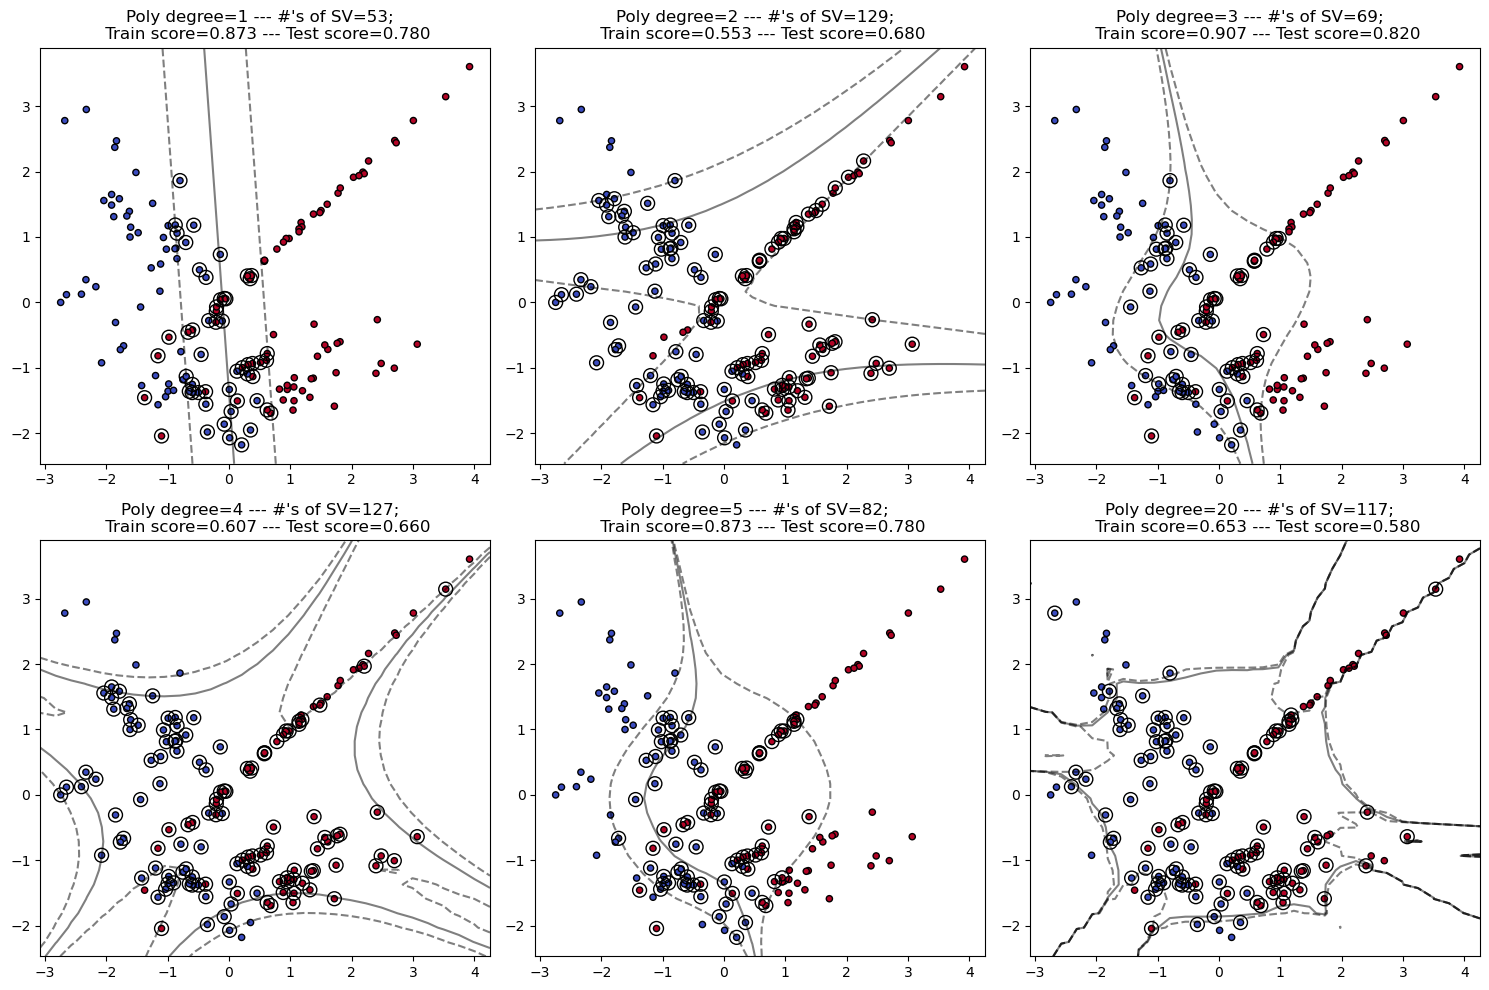

In [19]:
degrees = [1, 2, 3, 4, 5, 20]
compare_poly_degrees(X_train, y_train, X_test, y_test, degrees)

### Compare Different C Values for Degree 3 and 5

#### Degree 3:

Out of all the testings, C=0.01 has the best test score as well as the smallest difference between train score and test score. C=10e3 (no regulization) has very good training score but very poor test score. The extreme case of C=1e-10 (over regulization) is shown again where almost all of the data is used as SVs.

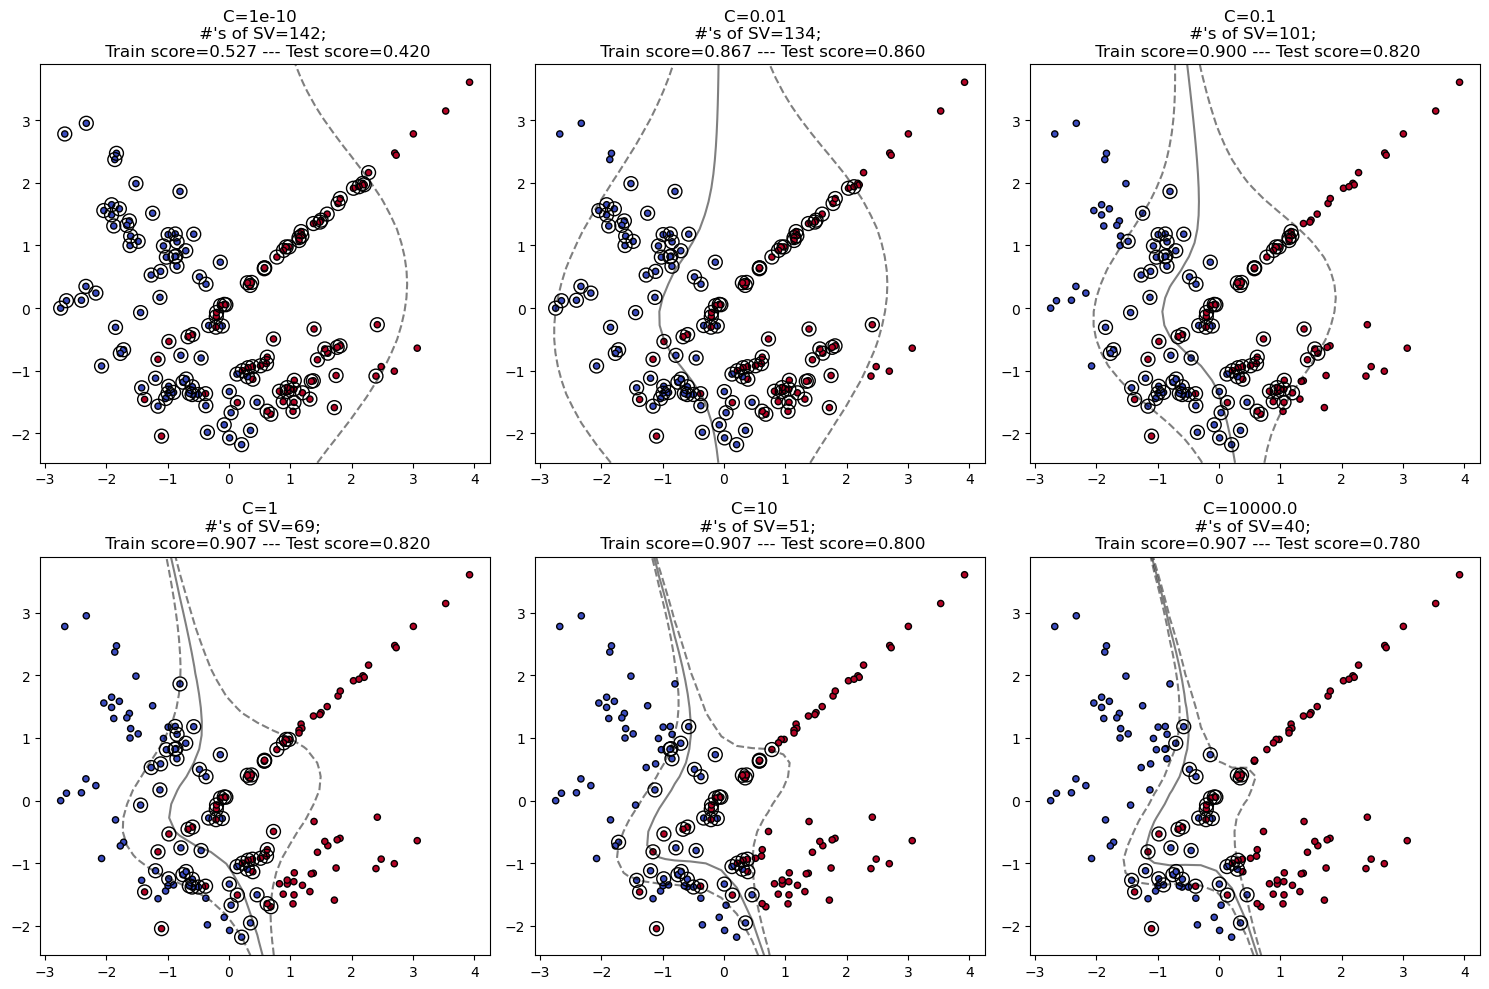

In [20]:
C_values = [1e-10, 0.01, 0.1, 1, 10, 10e3]
compare_svm_C_values(X_train, y_train, X_test, y_test, C_values, 'poly', 3)

#### Degree 5

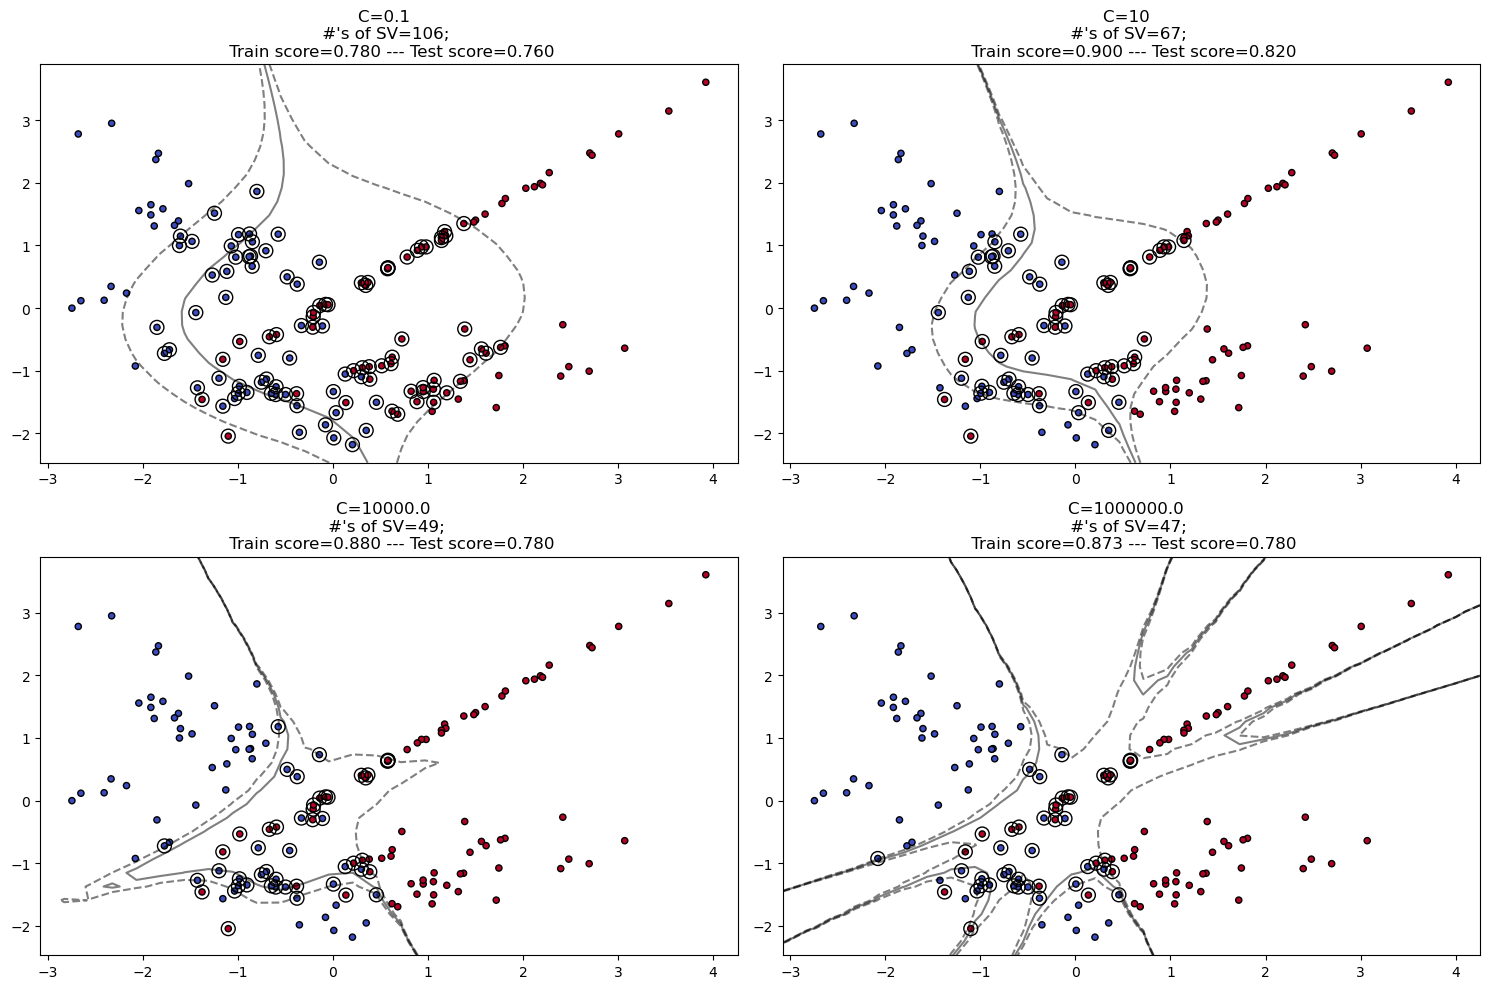

In [21]:
C_values = [0.1, 10, 10e3, 10e5]
compare_svm_C_values(X_train, y_train, X_test, y_test, C_values, 'poly', 5)

### Experiments with Gaussian Kernel

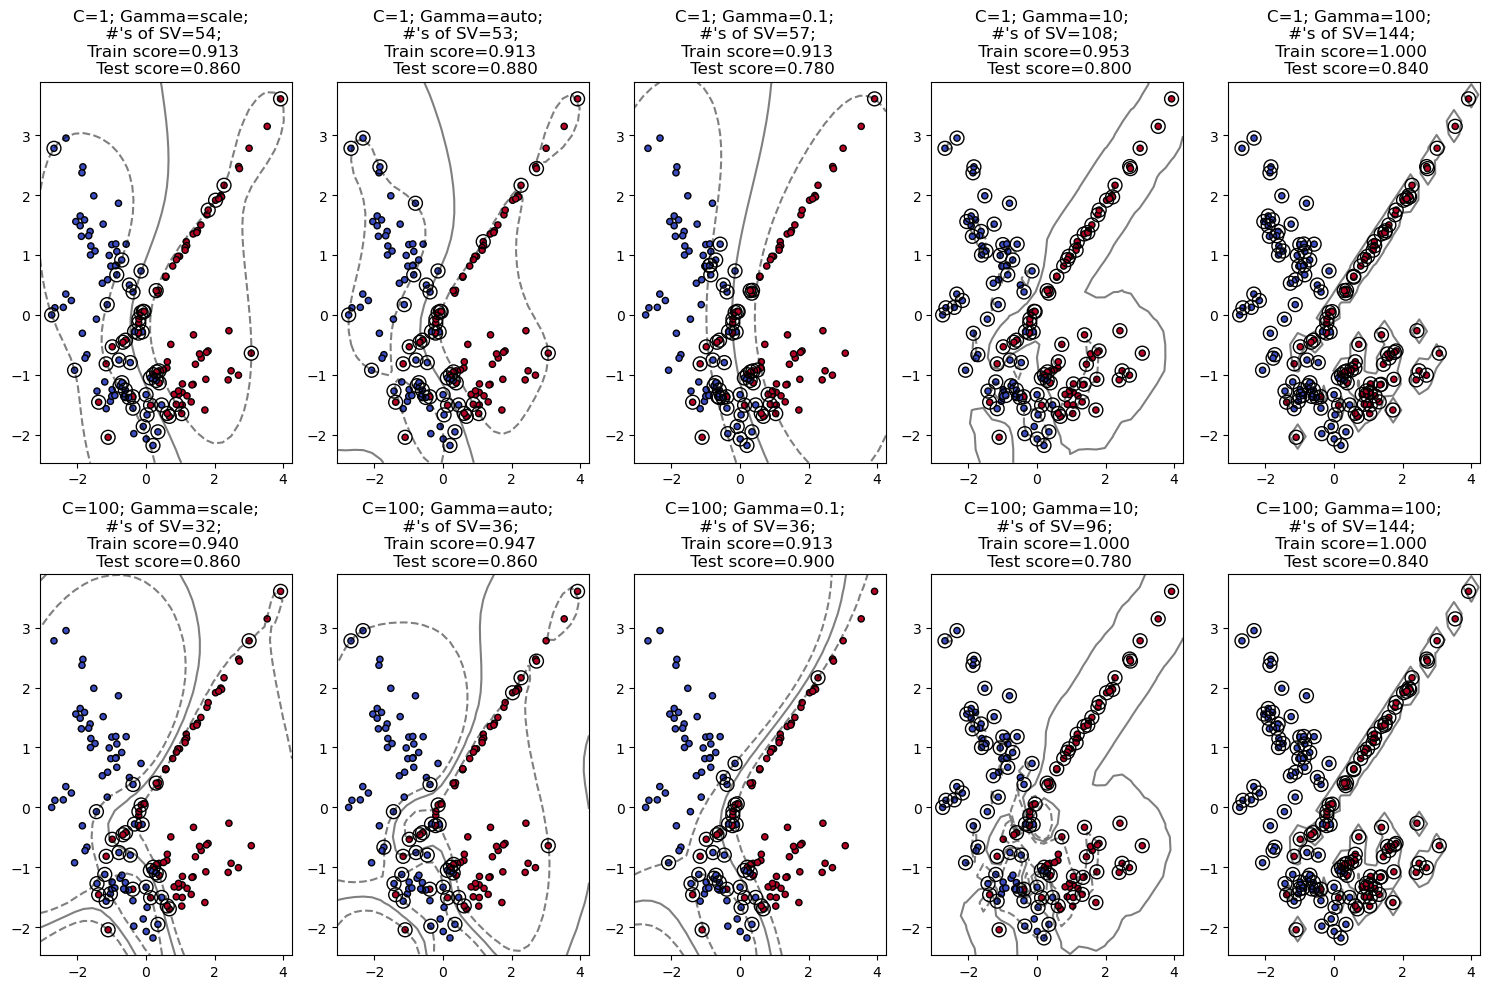

In [22]:
C_values = [1, 100]
gamma_values = ['scale', 'auto', 0.1, 10, 100]
compare_rbf(X_train, y_train, X_test, y_test, C_values, 'rbf', gamma_values)

The first row of plot shows the default regularization (C=1)  for different gammas. As Gamma increases, the margin fits the training data more closely. The extreme case is shown when $\gamma$ = 100, and that leads to a traning score of 1, which is overfitting. The second row compare how different values of C's affect the learning. As expected, a higher value of C leads to stricter regulizatoin, and thus a lower numbers of support vector. It appears that for the same value of gamma, a higher regularization results in a better score.  

# Computer Exercise 1.2 (SVMs for Detecting Breast Cancer):

## 1. Linear Soft-Margin Support Vector Classifier

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test=train_test_split(X,y)
# Scale Data:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


__#Second way__

__scaler.fit(X_train)__

__X_train = scaler.transform(X_train)__

__X_test = scaler.transform(X_test)__

This is the correct method. After we split the data into a training set and a test set, the test set must be put away until we finish training. Method 2 trains the model from the scaling of the training data, and apply the same performace on the test set. Doing this will make sure the accuracy report for the test set will be reliable as the behavior of the model for "unseen" data. 

<font size="4">__Experiments__</font>

In [25]:
from prettytable import PrettyTable
print('Using Linear SVM:')
C_values =  [0.001, 0.01, 0.1, 1, 10, 100, 10e3]
SVM_cancer_linear(X_train, y_train, X_test, y_test, C_values, kernel='linear', degree=1)

Using Linear SVM:
+----------+---------+-------------+------------+
| C values | # of SV | Train score | Test score |
+----------+---------+-------------+------------+
|  0.001   |  209.0  |     0.94    |    0.94    |
|   0.01   |   97.0  |     0.98    |    0.97    |
|   0.1    |   48.0  |     0.99    |    0.97    |
|    1     |   31.0  |     0.99    |    0.97    |
|    10    |   23.0  |     1.00    |    0.95    |
|   100    |   24.0  |     1.00    |    0.95    |
| 10000.0  |   24.0  |     1.00    |    0.95    |
+----------+---------+-------------+------------+


Changing C does not have much effect on the performance of the classifiers. From the tests above, the train score are of 1% difference from each other. When C=10, we see a train score of 1 which inidicates overfitting. 

## 2. Nonlinear Soft-Margin Support Vector Classifier

From scikit-learn documentation, gamma='scale' is equal to $\frac{1}{n_{features}\cdot Var[X]}$, while gamma='auto' is equal to $\frac{1}{n_{features}}$.

Studying the table, notice that C=10 and C=100 are overfitting with training score of 1.00. For gamma=scale, C=0.1 produces the best scores. For gamma=auto, C=0.1 also produces the best scores. When gamma=10, the number of SVs increases drastically, which is where the model tries to capture every features and produces overfitting.

In [29]:
C_values =  [1, 0.01, 0.1, 10, 100]
SVM_cancer_rbf(X_train, y_train, X_test, y_test, C_values, kernel='rbf', degree=1, gamma_values=['scale', 'auto', 0.1, 10])

+-------+----------+---------+-------------+------------+
| Gamma | C values | # of SV | Train score | Test score |
+-------+----------+---------+-------------+------------+
| scale |    1     |  102.0  |     0.99    |    0.97    |
| scale |   0.01   |  330.0  |     0.62    |    0.66    |
| scale |   0.1    |  198.0  |     0.95    |    0.96    |
| scale |    10    |   79.0  |     0.99    |    0.97    |
| scale |   100    |   67.0  |     1.00    |    0.97    |
|  auto |    1     |  102.0  |     0.99    |    0.97    |
|  auto |   0.01   |  330.0  |     0.62    |    0.66    |
|  auto |   0.1    |  198.0  |     0.95    |    0.96    |
|  auto |    10    |   79.0  |     0.99    |    0.97    |
|  auto |   100    |   67.0  |     1.00    |    0.97    |
|  0.1  |    1     |  183.0  |     0.99    |    0.97    |
|  0.1  |   0.01   |  334.0  |     0.62    |    0.66    |
|  0.1  |   0.1    |  286.0  |     0.97    |    0.97    |
|  0.1  |    10    |  175.0  |     1.00    |    0.97    |
|  0.1  |   10

## 3. Dimensionality Reduction

Previously, 30-feauture best classifiers attain a 95%-96% train-test score. The two-feature classifiers shown below has very comparable, if not matching, results. The number of SVs are shown on each plot/model. Once again, we can observe the number of SVs increases as the strength of regulization increases.

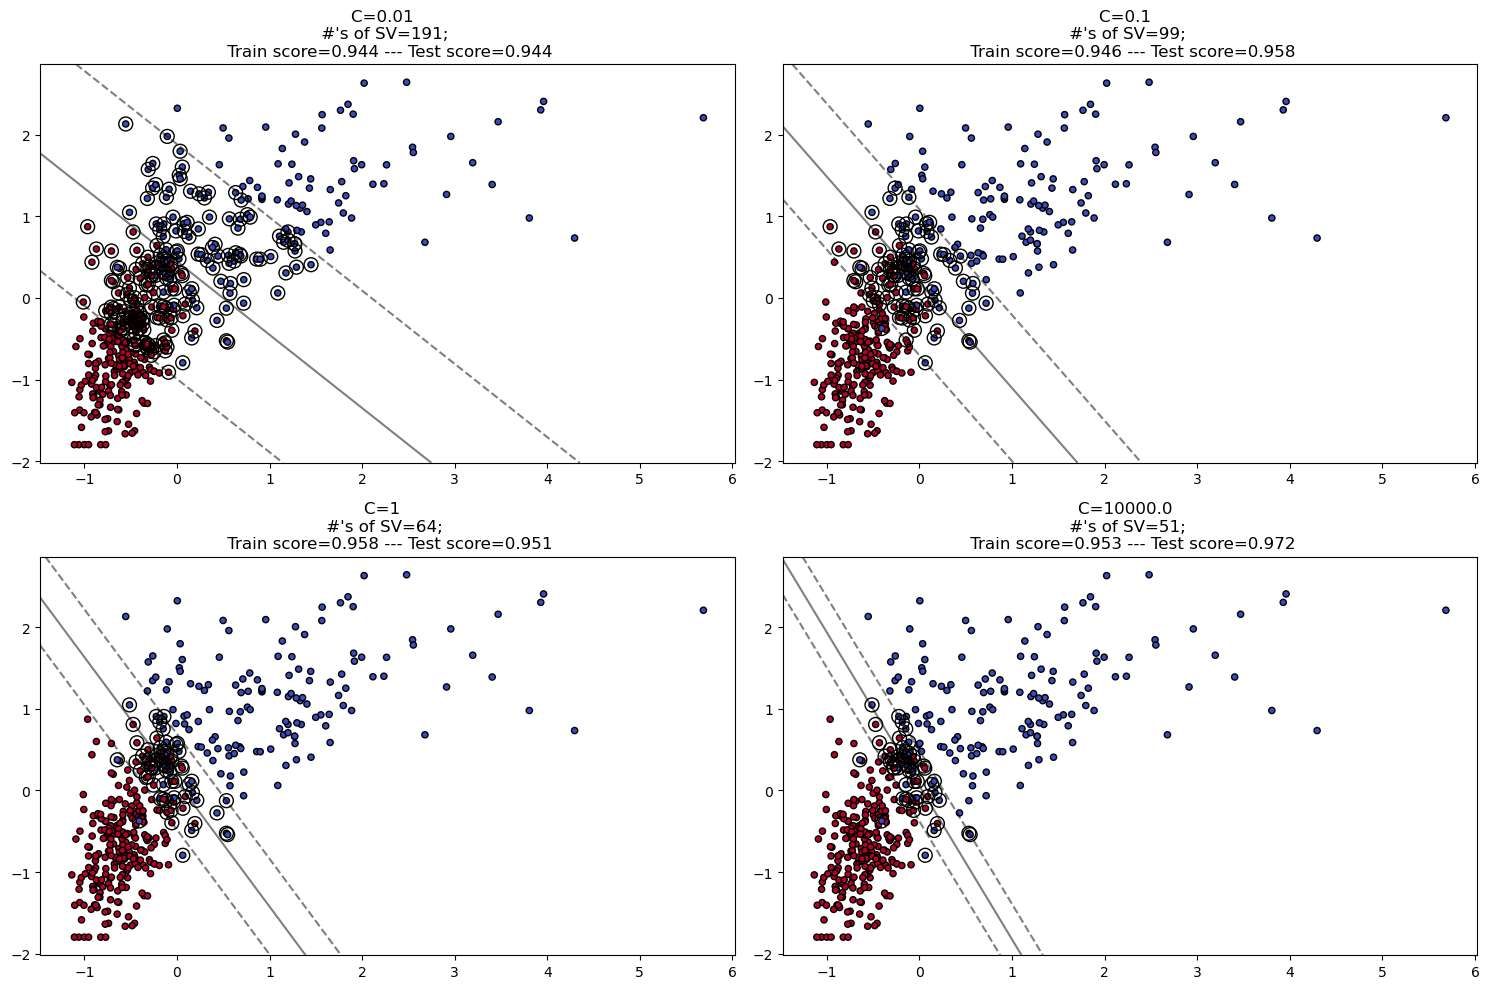

In [30]:
X_train_2f = np.column_stack((X_train[:,[23]],X_train[:,[27]]))
X_test_2f = np.column_stack((X_test[:,[23]],X_test[:,[27]]))
C_values=[0.01,0.1,1,10e3]
compare_svm_C_values(X_train_2f, y_train, X_test_2f, y_test, C_values,'linear',1)

### Feature Reduction for Polynomial Kernel with Degree p = 3.

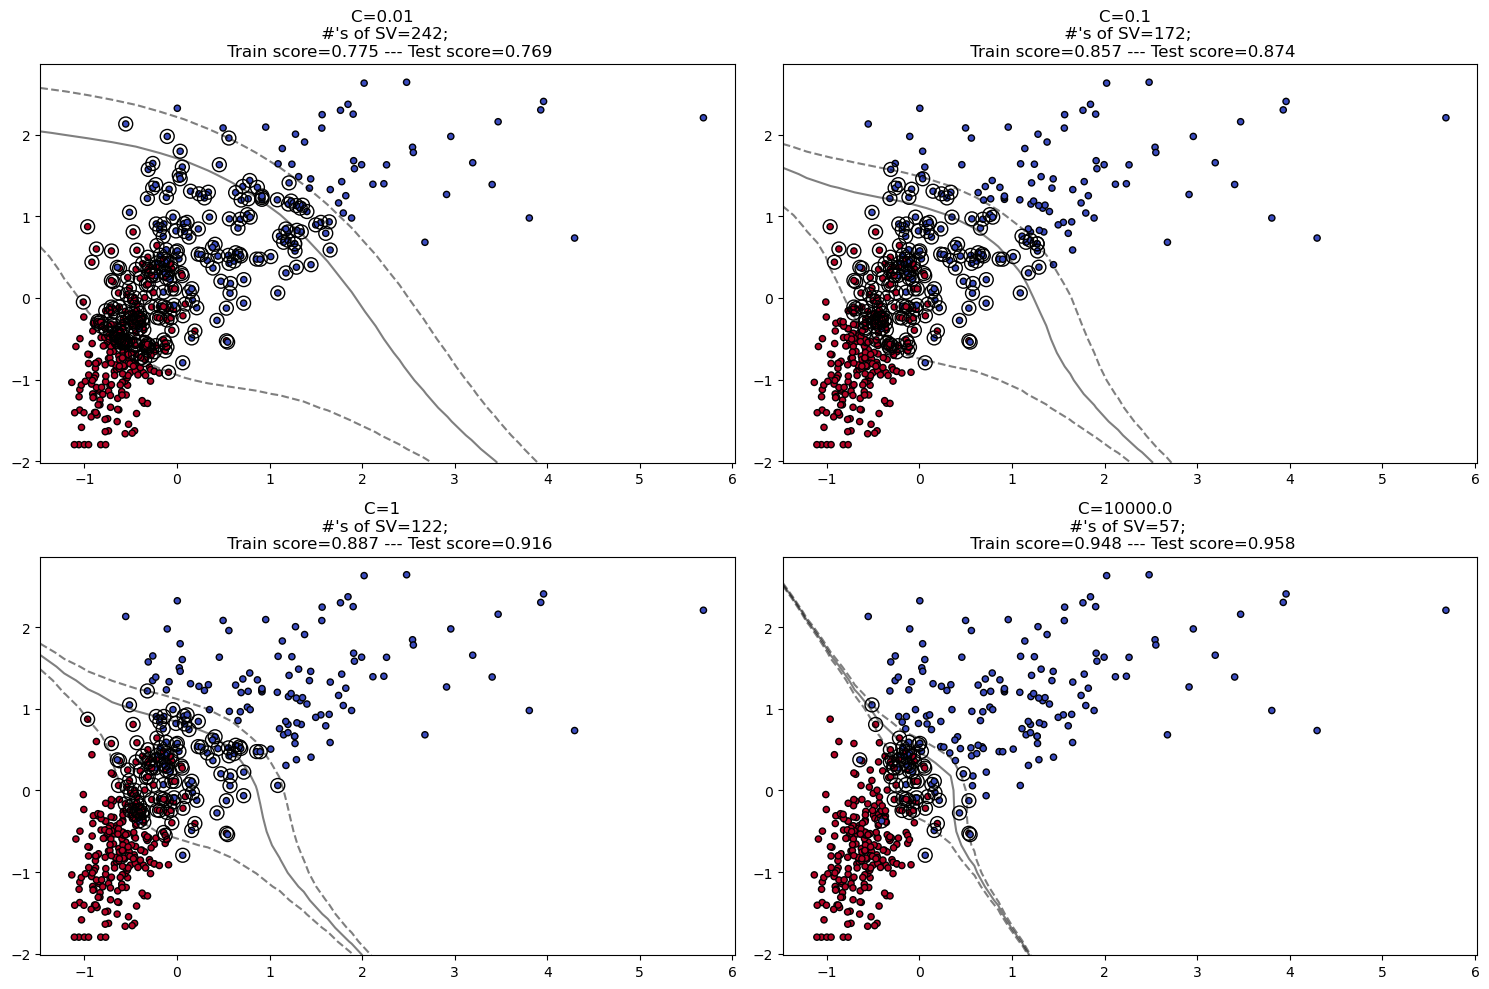

In [31]:
C_values = [0.01,0.1,1,10e3]
compare_svm_C_values(X_train_2f, y_train, X_test_2f, y_test, C_values,'poly',3)

## 4. Cross Validation

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': np.logspace(-2, 2, 20),  # C from 0.01 to 100 on a log scale
    'kernel': ['linear', 'poly'],
    'degree': [3]  # Degree 3 for polynomial kernel
}

svc = SVC()
clf = GridSearchCV(svc, parameters)


clf = GridSearchCV(svc, parameters, cv=5) # 5 folds.should be by default. include for clarity
clf.fit(X_train_2f,y_train)

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)
print("Best estimator:", clf.best_estimator_)

Best parameters: {'C': 1.2742749857031335, 'degree': 3, 'kernel': 'linear'}
Best score: 0.9600820793433653
Best estimator: SVC(C=1.2742749857031335, kernel='linear')


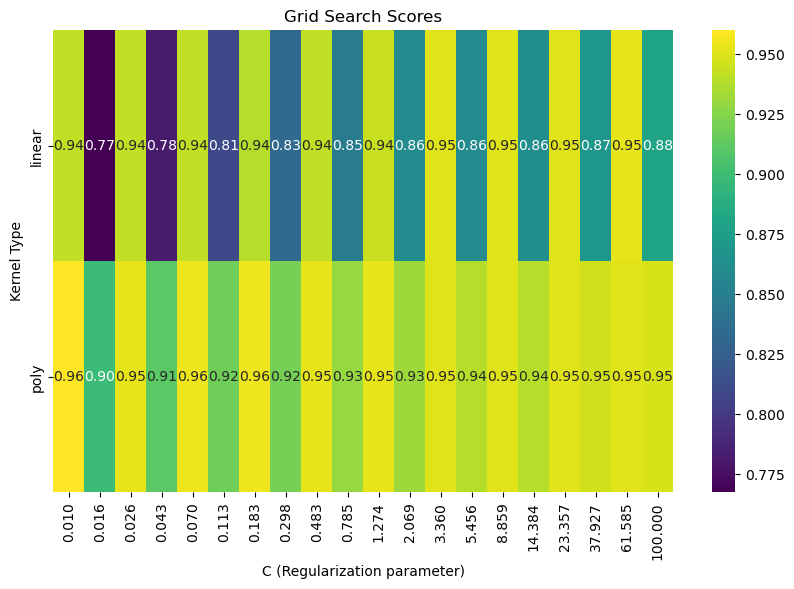

In [36]:
import seaborn as sns
# Extract information
cv_results = clf.cv_results_ 
scores_matrix = cv_results['mean_test_score'].reshape(len(parameters['kernel']), len(parameters['C']))

# Create a heatmap
C_labels = [f"{c:.3f}" for c in parameters['C']]


plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=C_labels, yticklabels=parameters['kernel'])

plt.xlabel('C (Regularization parameter)')
plt.ylabel('Kernel Type')
plt.title('Grid Search Scores')
plt.show()


In [37]:
best_model = clf.best_estimator_
accuracy = best_model.score(X_train_2f, y_train)
test_accuracy = best_model.score(X_test_2f, y_test)

print("Accuracy of the best estimator on the full dataset X_train:", accuracy)
print("Accuracy of the best estimator on the test set:", test_accuracy)

Accuracy of the best estimator on the full dataset X_train: 0.9530516431924883
Accuracy of the best estimator on the test set: 0.951048951048951


The accuracy of the best estimators on both the training set and the test set are very close, indicatings the model is reliable in predicting unseen data. Previously, we have to input and compute manually all the hyperparameters to find the best parameters. The CV package from Scikit provides methodical solutions to find the best parameters. 

# Extra Credit

In [126]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print("Training Score:", train_score)
test_score = clf.score(X_test, y_test)
print("Testing Score:", test_score)

Training Score: 0.9483568075117371
Testing Score: 0.916083916083916


The training and testing score does not have much discrepency, indicating reliability for predicting unseen data. The score of 94%-91% are quite decent. However, the performance is poorer than of the best estimator found using cross validation. A plausible reason could be the assumption of features being independent to one another is "naive".

# User-Defined Functions for This Project

In [14]:
# The function is learned from these sources:
# https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
def Plot_SVM(clf, X, y, C):
    """
    Plot the decision boundary, margins, and support vectors of a linear SVM classifier.
    
    Parameters:
    - clf: The fitted SVM classifier (with linear kernel).
    - X: Feature data, numpy array of shape (n_samples, d_features).
    - y: Target data, numpy array of shape (n_samples, 1).
    """
    
    # Create a grid to evaluate model
    x0, x1 = X[:, 0], X[:, 1]
    x_min, x_max = x0.min() - 1, x0.max() + 1
    y_min, y_max = x1.min() - 1, x1.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    
    # Plot decision boundary and margins
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', marker='o')
    
    # Plot data points
    plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    numSV = clf.support_vectors_[:, 0].size
    plt.title(f'C={C}; #\'s of SV={numSV}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()
    print("Number of support vectors for each class:", clf.n_support_)

In [2]:
def compare_svm_C_values(X_train, y_train, X_test, y_test, C_values, kernel, degree):
    plt.figure(figsize=(15, 10))
    
    for i, C in enumerate(C_values):
        # Create SVM model with linear kernel and different C values
        clf = SVC(kernel=kernel, degree=degree, C=C)
        clf.fit(X_train, y_train)
        
        # Plot decision boundary
        plt.subplot(2, len(C_values)//2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        
        # Plot decision boundary and margins
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        # Create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
        
        # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        # Plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
        numSV = clf.support_vectors_[:, 0].size
        score1 = clf.score(X_train,y_train)
        score2 = clf.score(X_test,y_test)
        plt.title(f'C={C}  \n #\'s of SV={numSV};  \n Train score={score1:.3f} --- Test score={score2:.3f}')

    plt.tight_layout()
    plt.show()

In [3]:
# Function to compare different degrees of polynomial kernel
def compare_poly_degrees(X_train, y_train, X_test, y_test, degrees):
    plt.figure(figsize=(15, 10))
    for i, degree in enumerate(degrees):
        clf = SVC(kernel='poly', degree=degree, C=1)
        clf.fit(X_train, y_train)
        
        # Plot decision boundary
        plt.subplot(2, len(degrees)//2, i + 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        
        # Plot decision boundary and margins
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        # Create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)
        
        # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        # Plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
        numSV = clf.support_vectors_[:, 0].size
        score1 = clf.score(X_train,y_train)
        score2 = clf.score(X_test,y_test)
        plt.title(f'Poly degree={degree} --- #\'s of SV={numSV};  \n Train score={score1:.3f} --- Test score={score2:.3f}')
    plt.tight_layout()
    plt.show()

In [4]:
def compare_rbf(X_train, y_train, X_test, y_test, C_values, kernel, gamma_values):
    plt.figure(figsize=(15, 10))
    count = 0;
    for i, C in enumerate(C_values):
        for j, gamma in enumerate (gamma_values):
            count += 1
            # Create SVM model with linear kernel and different C values
            clf = SVC(kernel=kernel, gamma=gamma, C=C)
            clf.fit(X_train, y_train)

            # Plot decision boundary
            plt.subplot(len(C_values), len(gamma_values), count)
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

            # Plot decision boundary and margins
            ax = plt.gca()
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()

            # Create grid to evaluate model
            xx = np.linspace(xlim[0], xlim[1], 30)
            yy = np.linspace(ylim[0], ylim[1], 30)
            YY, XX = np.meshgrid(yy, xx)
            xy = np.vstack([XX.ravel(), YY.ravel()]).T
            Z = clf.decision_function(xy).reshape(XX.shape)

            # Plot decision boundary and margins
            ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
            # Plot support vectors
            ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
            numSV = clf.support_vectors_[:, 0].size
            score1 = clf.score(X_train,y_train)
            score2 = clf.score(X_test,y_test)
            plt.title(f'C={C}; Gamma={gamma};  \n #\'s of SV={numSV};  \n Train score={score1:.3f}  \n Test score={score2:.3f}')

    plt.tight_layout()
    plt.show()

In [5]:
def SVM_cancer_rbf(X_train, y_train, X_test, y_test, C_values, kernel, degree, gamma_values):
    import numpy as np

    train_score = np.zeros((len(gamma_values), len(C_values)), dtype=float)
    test_score = np.zeros((len(gamma_values), len(C_values)), dtype=float)
    numSV = np.zeros((len(gamma_values), len(C_values)), dtype=float)

    for i, gamma in enumerate(gamma_values):
        for j, C in enumerate(C_values):
            # Create SVM model with specified kernel, degree, C value, and gamma value
            clf = SVC(kernel=kernel, degree=degree, C=C, gamma=gamma)
            clf.fit(X_train, y_train)
            numSV[i, j] = clf.support_vectors_.shape[0]
            train_score[i, j] = clf.score(X_train, y_train)
            test_score[i, j] = clf.score(X_test, y_test)

    # Define headers
    headers = ["Gamma", "C values", "# of SV", "Train score", "Test score"]

    # Create a PrettyTable instance
    table = PrettyTable()

    # Add columns
    table.field_names = headers

    # Add rows by iterating over the arrays
    for i, gamma in enumerate(gamma_values):
        for j, C in enumerate(C_values):
            # Format train and test scores to display only two decimal places
            train_score_formatted = "{:.2f}".format(train_score[i, j])
            test_score_formatted = "{:.2f}".format(test_score[i, j])
            table.add_row([gamma, C, numSV[i, j], train_score_formatted, test_score_formatted])
            

    # Print table
    print(table)


In [6]:
def SVM_cancer_linear(X_train, y_train, X_test, y_test, C_values, kernel, degree):
    
    import numpy as np
    train_score = np.zeros((1, len(C_values)), dtype=float)
    test_score = np.zeros((1, len(C_values)), dtype=float)
    numSV = np.zeros((1, len(C_values)), dtype=float)

    for i, C in enumerate(C_values):
        # Create SVM model with specified kernel, degree, and C value
        clf = SVC(kernel=kernel, degree=degree, C=C)
        clf.fit(X_train, y_train)
        
        numSV[0,i] = clf.support_vectors_.shape[0]
        train_score[0,i] = clf.score(X_train, y_train)
        test_score[0,i] = clf.score(X_test, y_test)

    # Define headers
    headers = ["C values", "# of SV", "Train score", "Test score"]

    # Create a PrettyTable instance
    table = PrettyTable()

    # Add columns
    table.field_names = headers

    # Add rows by iterating over the arrays
    for C, SV, train, test in zip(C_values, numSV[0], train_score[0], test_score[0]):
        # Format train and test scores to display only two decimal places
        train_score_formatted = "{:.2f}".format(train)
        test_score_formatted = "{:.2f}".format(test)
        table.add_row([C, SV, train_score_formatted, test_score_formatted])

    # Print table
    print(table)